In [1]:
import pandas as pd
import numpy as np
import math
import artm
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt

In [2]:
#tr_types = pd.read_csv('tr_types.csv', sep=';')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
#customer_gender = pd.read_csv('customers_gender_train.csv')
transactions = pd.read_csv('transactions.csv')

In [211]:
tr = transactions[transactions.mcc_code == 5621]
len(tr[tr.amount>0])

127

In [3]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [4]:
tr_mcc_codes.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [7]:
customers = list(set(transactions['customer_id'].values))

In [8]:
n_d_plus = {}
n_d_minus = {}
for customer in customers:
    df = transactions[transactions['customer_id'] == customer]
    df_minus = df[df['amount'] < 0]
    df_plus = df[df['amount'] > 0]
    n_d_plus[customer] = df_plus['amount'].sum() / (math.pi**math.e)
    n_d_minus[customer] = df_minus['amount'].sum() / (math.pi**math.e)


In [9]:
transactions_m = transactions[transactions.amount < 0]
transactions_p = transactions[transactions.amount > 0]

In [10]:
tmp_m = transactions_m.groupby(['customer_id', 'mcc_code'])['amount'].sum().reset_index()
tmp_p = transactions_p.groupby(['customer_id', 'mcc_code'])['amount'].sum().reset_index()

In [11]:
l = list(set(tmp_m.mcc_code))
users = {}
cats = {}
vocabulary = {}
for i, x in enumerate(l):
    #print i
    vocabulary[i] = str(l[i])+'_m'
    cats[str(l[i])+'_m'] = i
    
ll = list(set(tmp_p.mcc_code))
for i, x in enumerate(ll):
    #print i+len(l)
    vocabulary[len(l) + i] = str(ll[i])+'_p'
    cats[str(ll[i])+'_p'] = len(l) + i

    

In [12]:
for i, c in enumerate(customers):
    users[c] = i
mapping = {}
for key, value in users.iteritems():
    mapping[value] = key

In [243]:
mapping = {}
for key, value in users.iteritems():
    mapping[value] = key

In [246]:
import pickle
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [248]:
save_obj(mapping, "mapping")

In [13]:
n_wd = np.zeros(shape=(329, len(customers)))

In [258]:
tmp_m

,customer_id,mcc_code,amount
0,6815,4814,-249341.93
1,6815,5311,-234030.50
2,6815,5411,-236046.19
3,6815,5921,-24929.67
4,6815,6011,-3211659.68
5,22899,4814,-175673.79
6,22899,4829,-3134488.76
7,22899,5331,-11869.67
8,22899,5399,-4626.59
9,22899,5411,-89936.80


In [15]:
for i in range(0, len(tmp_p)):
    x = tmp_p.iloc[i]
    c = x.customer_id
    am = x.amount
    cod = str(int(x.mcc_code)) + '_p'
    n_wd[cats[cod]][users[c]] = am / n_d_plus[c] / (math.pi**math.e)
for i in range(0, len(tmp_m)):
    x = tmp_m.iloc[i]
    c = x.customer_id
    am = x.amount
    cod = str(int(x.mcc_code)) + '_m'
    n_wd[cats[cod]][users[c]] = am / n_d_minus[c] / (math.pi**math.e)

In [16]:
n_wd.shape

(329, 15000)

In [17]:
def print_measures(model_artm):
    print 'Sparsity Phi: {0:.3f} (PLSA)'.format(
        model_artm.score_tracker['sparsity_phi_score'].last_value)

    print 'Sparsity Theta: {0:.3f} (PLSA)'.format(
        model_artm.score_tracker['sparsity_theta_score'].last_value)

    print 'Kernel contrast: {0:.3f} (PLSA)'.format(
        model_artm.score_tracker['topic_kernel_score'].last_average_contrast)

    print 'Kernel purity: {0:.3f} (PLSA)'.format(
        model_artm.score_tracker['topic_kernel_score'].last_average_purity)

    print 'Perplexity: {0:.3f} (PLSA)'.format(
        model_artm.score_tracker['my_fisrt_perplexity_score'].last_value)
                                  
    plt.plot(xrange(model_artm.num_phi_updates), model_artm.score_tracker['my_fisrt_perplexity_score'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('PLSA perp. (blue)')
    plt.grid(True)
    plt.show()


In [18]:
batch_vectorizer = artm.BatchVectorizer(data_format='bow_n_wd', n_wd=np.array(n_wd), vocabulary=vocabulary)

In [19]:
batch_vectorizer.dictionary

artm.Dictionary(name=a416871c-9439-4228-a9df-bea5582b602c, num_entries=329)

In [20]:
model = artm.ARTM(num_topics=20, dictionary=batch_vectorizer.dictionary, cache_theta=True)

In [ ]:
model.scores.add(artm.PerplexityScore(name='my_fisrt_perplexity_score',
                                      dictionary=batch_vectorizer.dictionary))
model.scores.add(artm.TopTokensScore(name='top_tokens_score'))
model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score'))
model.scores.add(artm.SparsityThetaScore(name='sparsity_theta_score'))
model.scores.add(artm.TopicKernelScore(name='topic_kernel_score', probability_mass_threshold=0.1))



In [ ]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

In [29]:
print model.score_tracker['my_fisrt_perplexity_score'].value
print model.score_tracker['sparsity_phi_score'].value    # .last_value
print model.score_tracker['sparsity_theta_score'].value  # .last_value
saved_top_kernels =  model.score_tracker['topic_kernel_score'].last_tokens

for topic_name in model.topic_names:
    print saved_top_kernels[topic_name]
print '----------------------'
saved_top_tokens = model.score_tracker['top_tokens_score'].last_tokens

for topic_name in model.topic_names:
    print saved_top_tokens[topic_name]

[230.511426701756, 6.637696285200442, 6.153757548980955, 5.952662316369717, 5.823536998968667, 5.729716270154147, 5.665014922506659, 5.621733035049362, 5.592241414984148, 5.570723549015333, 5.554917698435936, 5.528533810917278, 5.51297355632951, 5.500252818956922, 5.4887002281198916, 5.477847341686515, 5.468180920338093, 5.459718544772921, 5.450941448007528, 5.439225624668738, 6.229719742754324, 5.722310017472355, 5.703855222286889, 5.701600711356237, 5.702172321630619, 5.70089725579405, 5.698211688484551, 5.698293849870252, 5.697405910270444, 5.69396215488404]
[0.0, 0.0, 0.00303951367781155, 0.0121580547112462, 0.022948328267477204, 0.037993920972644375, 0.05075987841945289, 0.06413373860182371, 0.0797872340425532, 0.09969604863221884, 0.11838905775075988, 0.13404255319148936, 0.14969604863221886, 0.16458966565349545, 0.18085106382978725, 0.19422492401215805, 0.20896656534954408, 0.22522796352583588, 0.2413373860182371, 0.25455927051671734, 0.28677811550151977, 0.30243161094224924, 0.

In [ ]:
print_measures(model)

In [230]:
model = artm.ARTM(num_topics=25, dictionary=batch_vectorizer.dictionary, cache_theta=True)
model.scores.add(artm.PerplexityScore(name='my_fisrt_perplexity_score',
                                      dictionary=batch_vectorizer.dictionary))
model.scores.add(artm.TopTokensScore(name='top_tokens_score'))
model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score'))
model.scores.add(artm.SparsityThetaScore(name='sparsity_theta_score'))
model.scores.add(artm.TopicKernelScore(name='topic_kernel_score', probability_mass_threshold=0.1))
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=30)
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer'))
#model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sparse_phi_regularizer'))
#model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='sparse_theta_regularizer'))

Sparsity Phi: 0.404 (PLSA)
Sparsity Theta: 0.084 (PLSA)
Kernel contrast: 0.507 (PLSA)
Kernel purity: 0.821 (PLSA)
Perplexity: 5.364 (PLSA)


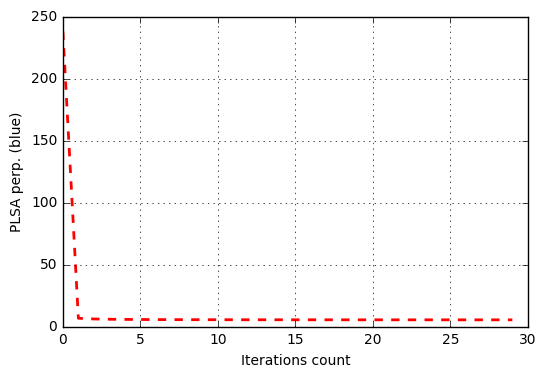

In [231]:
print_measures(model)
model.regularizers['decorrelator_phi_regularizer'].tau = 5e+2
#model.regularizers['sparse_phi_regularizer'].tau = 0.005
#model.regularizers['sparse_theta_regularizer'].tau = -0.1


In [232]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

Sparsity Phi: 0.722 (PLSA)
Sparsity Theta: 0.536 (PLSA)
Kernel contrast: 0.817 (PLSA)
Kernel purity: 0.987 (PLSA)
Perplexity: 4.845 (PLSA)


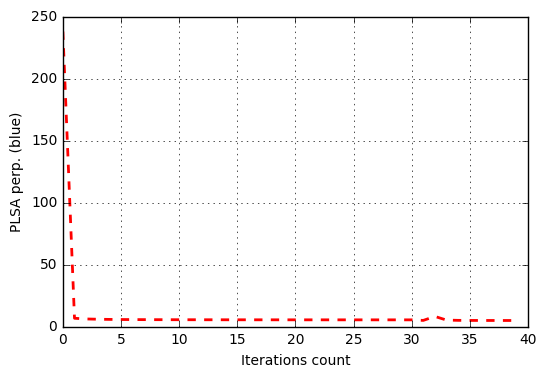

In [233]:
print_measures(model)

In [234]:
#model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sparse_phi_regularizer'))
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='sparse_theta_regularizer'))

In [235]:
#model.regularizers['sparse_phi_regularizer'].tau = 0.1
model.regularizers['sparse_theta_regularizer'].tau = -0.005

In [236]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

Sparsity Phi: 0.743 (PLSA)
Sparsity Theta: 0.750 (PLSA)
Kernel contrast: 0.626 (PLSA)
Kernel purity: 0.986 (PLSA)
Perplexity: 4.879 (PLSA)


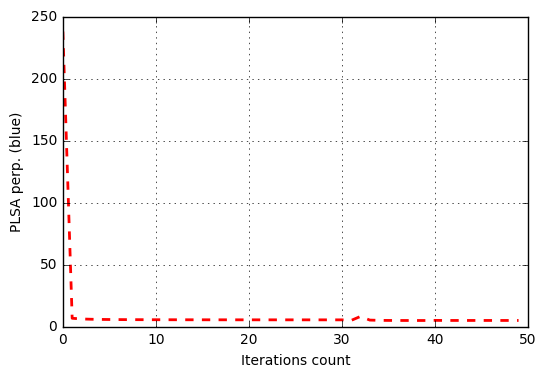

In [237]:
print_measures(model)

In [239]:
cnt = 0
for x in theta_matrix.columns[:100]:
    #print x
    kol = theta_matrix[theta_matrix[x] > 0.1][x].count()
    print(kol)
    if kol == 0:
        cnt = cnt + 1
print(cnt)

3
4
3
3
2
1
3
3
2
1
3
2
4
4
1
3
3
2
1
5
3
3
2
3
1
3
3
2
3
3
1
2
1
3
3
2
2
1
2
3
1
2
3
3
3
3
2
3
2
2
1
3
3
2
3
3
2
2
4
2
2
4
2
2
2
1
2
1
2
3
3
2
3
3
2
2
2
3
1
2
2
3
3
4
2
3
2
3
3
2
2
3
3
2
2
3
1
6
3
2
0


In [241]:
theta_matrix = model.get_theta()
theta_matrix

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
topic_0,0.000000,0.000560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020746,0.000000,0.000000,0.185560,0.255513,0.0,0.0,0.000000,0.000000
topic_1,0.000000,0.000000,0.000000,0.037865,0.011173,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
topic_2,0.455983,0.000000,0.008787,0.019196,0.000000,0.026098,0.000000,0.000000,0.033364,0.071814,...,0.068665,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.002306,0.037379
topic_3,0.219627,0.125741,0.276179,0.221308,0.279212,0.973902,0.425105,0.367024,0.468332,0.794965,...,0.210708,0.316435,0.481311,0.284343,0.454401,0.319861,1.0,1.0,0.292046,0.256222
topic_4,0.055850,0.051541,0.174447,0.176208,0.097842,0.000000,0.207376,0.103923,0.063696,0.004785,...,0.114979,0.150255,0.202409,0.363132,0.008953,0.231665,0.0,0.0,0.150459,0.213755
topic_5,0.000000,0.004111,0.017693,0.000000,0.000000,0.000000,0.015773,0.011839,0.065440,0.000000,...,0.040199,0.000000,0.041393,0.038785,0.000000,0.000000,0.0,0.0,0.000000,0.000000
topic_6,0.058941,0.269322,0.000000,0.000000,0.043369,0.000000,0.000000,0.000000,0.051732,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.018359,0.035682,0.0,0.0,0.000000,0.000000
topic_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
topic_8,0.000000,0.182501,0.000000,0.072001,0.000000,0.000000,0.094957,0.000000,0.120601,0.097770,...,0.026435,0.026525,0.026435,0.000000,0.000000,0.012036,0.0,0.0,0.009610,0.056953
topic_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [256]:
phi = model.phi_
for i, x in enumerate(phi):
    print "Pattern " + str(i)
    f = phi[x]
    y = f.nlargest(10)
    #print(y.index[0])
    for yy, name in zip(y, y.index):
        #print(name.split('_')[0])
        ss = tr_mcc_codes[tr_mcc_codes.mcc_code == int(name.split('_')[0])].mcc_description.iloc[0]
        #print name
        if name.split('_')[1] == 'p':
            c = '+'
        else:
            c = '-'
        print "%s %s %0.3f%%" % (c, ss, yy*100)
        
    

Pattern 0
+ Финансовые институты — торговля и услуги 61.223%
+ Бакалейные магазины, супермаркеты 12.740%
- Финансовые институты — торговля и услуги 6.602%
+ Магазины мужской и женской одежды 6.243%
+ Станции техобслуживания 3.970%
- Не-финансовые институты — иностранная валюта, денежные переводы (непередаваемые), дорожные чеки, квази-кэш 3.211%
+ Детская одежда, включая одежду для самых маленьких 2.399%
+ Мужская одежда и аксессуары, включая одежду для мальчиков 0.846%
+ Туристические агентства и организаторы экскурсий 0.536%
+ Аптеки 0.502%
Pattern 1
- Коммунальные услуги — электричество, газ, санитария, вода 16.116%
- Прямой маркетинг — торговля через каталог 15.088%
- Транзакции по азартным играм 12.424%
- Оборудование, мебель и бытовые принадлежности (кроме электрооборудования) 10.191%
+ Обувные магазины 8.772%
+ Прямой маркетинг — торговля через каталог 7.481%
+ Лесо- и строительный материал 6.137%
+ Садовые принадлежности (в том числе для ухода за газонами) в розницу 4.522%
+ Пла

In [ ]:
pattern_name = {}
pattern_name[12] = 'Мамы с маленькими детьми'
pattern_name[2] = 'Почти все по наличке'
pattern_name[5] = 'Турист, постоянно в перелетах'
pattern_name[1] = 'Человек сидящий дома с азартной зависимостью'
pattern_name[16] = 'Бизнес-класс'
pattern_name[4] = 'Переводит деньги на другую карту, часть тратит с данной'
pattern_name[8] = 'Потребитель среднего возраста'
pattern_name[9] = 'Эконом'
pattern_name[20] = 'Загородный житель'
pattern_name[24] = 'Студент'



In [ ]:
phi.head()

In [ ]:
phi.to_csv("phi.csv")
theta_matrix.to_csv('theta.csv')

In [242]:
phi.to_json("p2w.json")
theta_matrix.to_json('c2p.json')